<a href="https://colab.research.google.com/github/Temidayomichael/MSC_Binary-classification/blob/main/AUO_MSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving endsars_combine.xlsx to endsars_combine.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['endsars_combine.xlsx']))

In [ ]:
df.head()

,tweet,tag
0,"We’re with Nobody in the North, we’re alone, h...",0
1,I bet you without a good plan and calculated a...,0
2,Don’t End SARS #sars must stay #sars help #we ...,0
3,we need #sars to end bandits and kidnappers. ...,0
4,There's no different between Yahoo boys and ar...,0


# **Data preprocessing**

---

**Exploratory Data Analysis**

In [ ]:
# checking for null values in the dataset
df.isnull().sum()

tweet    0
tag      0
dtype: int64

In [ ]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature tweet is: 195
The number of values for feature tag is: 2 -- [0 1]


In [ ]:
#Clean the dataset

def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)
df['tweet'] = df['tweet'].apply(clean)
df.head()

,tweet,tag
0,"We’re with Nobody in the North, we’re alone, h...",0
1,I bet you without a good plan and calculated a...,0
2,Don’t End SARS #sars must stay #sars help #we ...,0
3,we need #sars to end bandits and kidnappers. ...,0
4,There's no different between Yahoo boys and ar...,0


In [ ]:
# english stop words
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


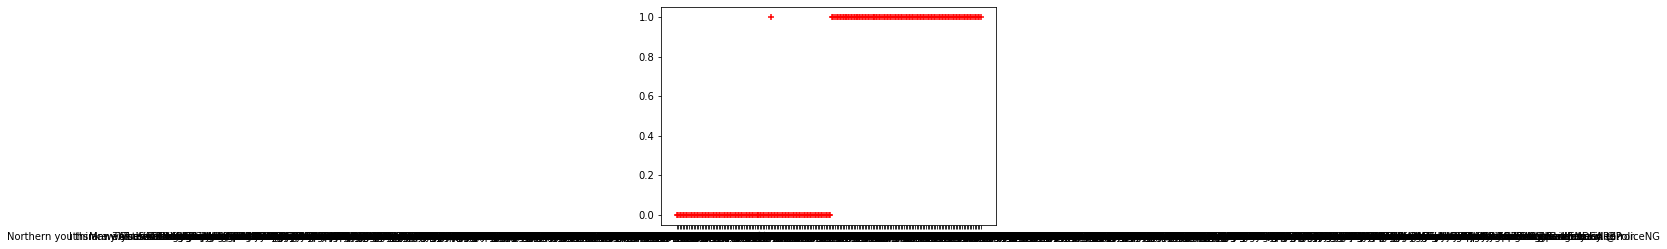

In [ ]:
plt.scatter(df.tweet,df.tag,marker='+',color='red')

In [ ]:
#check if dataset contains alphanumeric
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem
df.head()
df.tweet = df.tweet.apply(is_special)
df.head()

,tweet,tag
0,We re with Nobody in the North we re alone h...,0
1,I bet you without a good plan and calculated a...,0
2,Don t End SARS sars must stay sars help we ...,0
3,we need sars to end bandits and kidnappers ...,0
4,There s no different between Yahoo boys and ar...,0


In [ ]:
#Change tweet column to lower
def to_lower(text):
    return text.lower()

df.tweet = df.tweet.apply(to_lower)
df.head()

,tweet,tag
0,we re with nobody in the north we re alone h...,0
1,i bet you without a good plan and calculated a...,0
2,don t end sars sars must stay sars help we ...,0
3,we need sars to end bandits and kidnappers ...,0
4,there s no different between yahoo boys and ar...,0


In [ ]:
#Remove stopwords from dataset
from nltk.corpus import stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df.tweet = df.tweet.apply(rem_stopwords)
df.head()

,tweet,tag
0,"[nobody, north, alone, problem, banditry, sars...",0
1,"[bet, without, good, plan, calculated, actions...",0
2,"[end, sars, sars, must, stay, sars, help, love...",0
3,"[need, sars, end, bandits, kidnappers, need, e...",0
4,"[different, yahoo, boys, armed, robbers, prote...",0


In [ ]:
#Stematize the dataset
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])
df.tweet = df.tweet.apply(stem_txt)
df.tweet[0]
df.head()

,tweet,tag
0,nobodi north alon problem banditri sar must st...,0
1,bet without good plan calcul action win scape ...,0
2,end sar sar must stay sar help love sar sar bl...,0
3,need sar end bandit kidnapp need endsar reform...,0
4,differ yahoo boy arm robber protest sar south ...,0


In [ ]:
df.tag = df.tag.apply(str)
df.info() 
df = df.sample(frac=1).reset_index(drop=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   200 non-null    object
 1   tag     200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


,tweet,tag
0,reformsar rather end still alway need servic i...,0
1,call endsar protest nigeria today coka cola lo...,0
2,imagin abl protest anoth man countri unharm in...,1
3,mr presid use militari polic forc suppress pro...,0
4,oh nigeria world hear turn away,1
...,...,...
195,say endsar danger sar self,0
196,leader wan throw us new prison fmt prison sinc...,1
197,join movement better nigeria happi welfar,1
198,think issu sar like southern need sar north,0


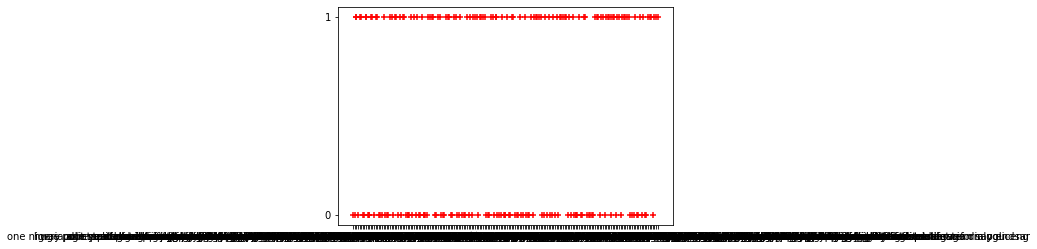

In [ ]:
plt.scatter(df.tweet,df.tag,marker='+',color='red')

In [ ]:
#change dataset to integer
X = df['tweet'].values
y = df['tag'].values
cv = CountVectorizer()
X = cv.fit_transform(df.tweet).toarray()

In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Split dataset into test and training 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(X_train.shape,y_train.shape))
print("Test shapes : X = {}, y = {}".format(X_test.shape,y_test.shape))
Train_shapes: X
Test_shapes : X

Train shapes : X = (160, 1005), y = (160,)
Test shapes : X = (40, 1005), y = (40,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


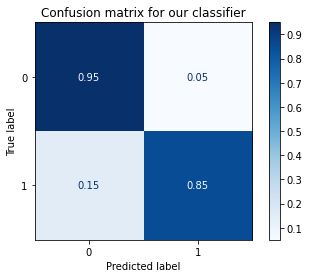

In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
KNearest = KNeighborsClassifier()
KNearest.fit(X_train,y_train)
    #test
kn_test= KNearest.predict(X_test)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
Regression = LogisticRegression()
Regression.fit(X_train,y_train)
    #test
regres_test= Regression.predict(X_test)

#SVM
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X_train, y_train)

# Predict the test set
svm_predict = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()



In [ ]:
print("KNearest = ",accuracy_score(y_test,kn_test))
print("Regression = ",accuracy_score(y_test,regres_test))
print("SVM = ",accuracy_score(y_test,svm_predict))


KNearest =  0.8
Regression =  0.9
SVM =  0.9


In [ ]:
from scipy.special import expit, logit

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.94      0.85      0.89        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [ ]:
cm=confusion_matrix(y_test,kn_test)
regres=confusion_matrix(y_test,regres_test)
svm=confusion_matrix(y_test,svm_predict)

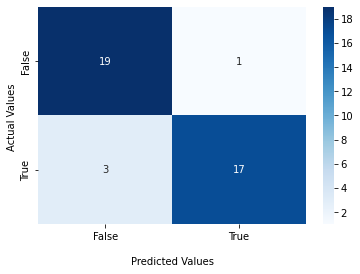

In [ ]:
import seaborn as sns
ax = sns.heatmap(svm, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

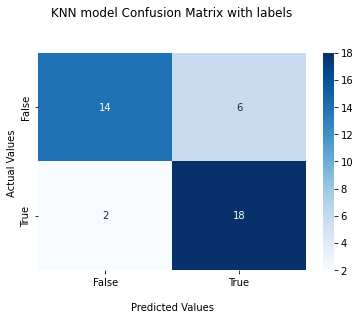

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('KNN model Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
filename = 'Knearest.sav'
pickle.dump(KNearest, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print("KNearest = ",accuracy_score(y_test,result))
print(result)

KNearest =  0.8
['0' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '1' '1' '0' '1' '1'
 '1' '1' '0' '0']


In [ ]:
# filename = 'regression.sav'
# pickle.dump(Regression, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open('./drive/MyDrive/regression.sav', 'rb'))
result = loaded_model.predict(X_test)
print("Regression = ",accuracy_score(y_test,result))
print(result)

Regression =  1.0
['0' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '0' '1'
 '0' '0' '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '1'
 '1' '0' '0' '0']
